In [75]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns
%matplotlib inline

# Importing data from the URL & a creating dataframe

In [76]:
data = "http://bit.ly/w-data" #defines where the data is being taken from
df = pd.read_csv(data) #creates a dataframe

df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [77]:
df.info() #gives information about each attriute's datatype and determines whether it has null values or not

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [78]:
print("The dataframe has a shape of", df.shape)
print()
print("General statistical information of the dataframe: ")
df.describe() #describes the statistical information of the data

The dataframe has a shape of (25, 2)

General statistical information of the dataframe: 


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Visualising the data

AttributeError: 'AxesSubplot' object has no attribute 'distplot'

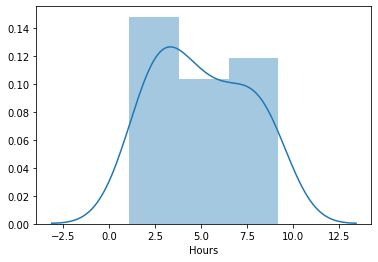

In [223]:
fig = plt.figure(figsize = (20,10))
axis1 = fig.add_subplot(120)
axis = fig.add_subplot(120)
sns.distplot(df['Hours'])
sns.distplot(df['Scores'])

In [79]:
fig = px.scatter(df, x="Hours", y="Scores", color_discrete_sequence=px.colors.sequential.RdBu, title="Hours vs Percentage")
fig.show()

There is an obvious positive linear correlation between the test scores and the time spent studying. To determine the exact correlation, a heatmap can be used. 

There is a correlation of 0.98 between the two factors


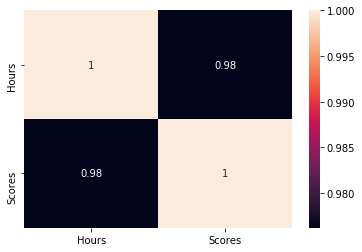

In [80]:
sns.heatmap(df.corr(), annot = True)
print("There is a correlation of 0.98 between the two factors")

# Preparation of data

In [208]:
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values  

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0) 

This ensures that the data is split - 75% training and 25% testing

# Model Building

In [209]:
from sklearn.linear_model import LinearRegression  
reg = LinearRegression()  
reg.fit(X_train, y_train) 

print("Training has been completed")

Training has been completed


In [210]:
line = reg.coef_*X+reg.intercept_
line = pd.DataFrame(line)
line.head()

,0
0,26.786400
1,52.634764
2,33.745575
3,86.436470
4,36.728078


In [211]:
fig = px.scatter(df, x="Hours", y="Scores", trendline="ols", color_discrete_sequence=px.colors.sequential.RdBu, title="Hours vs Percentage")
fig.show()

# Testing the data

In [212]:
print(X_test)
y_pred = reg.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]]


In [213]:
test_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
test_df 

,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


# Predicting test scores

In [214]:
pred = reg.predict([[9.25]])
print("Predicted Score will be {}".format(pred[0]),"%")

Predicted Score will be 93.89272889341652 %


# Predicting other scores by inserting the hours spent on studying

In [219]:
hour = float(input("Enter the amount of time spent studying (in hours): "))
score_pred = reg.predict([[hour]])

print("The predicted score for this student would be {}".format(score_pred[0]),"%")

Enter the amount of time spent studying (in hours): 8.5
The predicted score for this student would be 86.43647013880047 %


# Evaluating the model

In [216]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('R^2 Square:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.130879918502482
R^2 Square: 0.9367661043365056
